In [1]:
import platform
import sys
import ssl

print("os:            " + platform.platform())
print("python         " + sys.version)
print("openssl:       " + ssl.OPENSSL_VERSION)
print("TLSv1.2:       " + str(ssl.PROTOCOL_TLSv1_2))
print()

os:            Windows-10-10.0.19041-SP0
python         3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
openssl:       OpenSSL 1.1.1d  10 Sep 2019
TLSv1.2:       _SSLMethod.PROTOCOL_TLSv1_2



In [2]:
# conda install -c anaconda mysql-connector-python

import mysql.connector as mysql

cnx = mysql.connect(
    host="mysqllahmansbaseball.mysql.database.azure.com", # this server will not remain available in the long term
    user="newuser@mysqllahmansbaseball",                  # this user name will not remain available in the long term
    password="Pa$$w0rd",                                  # this password will not remain available in the long term
    port=3306,
    ssl_disabled=True,                                    # not usually suitable for production code
    database="lahmansbaseballdb")
print(cnx)
print()


In [3]:
#You can query database directly using pandas.read_sql()

In [4]:
import pandas as pd

data = pd.read_sql("""
SELECT p.nameFirst, p.nameLast FROM People p
ORDER BY p.nameLast, p.nameFirst
""", cnx)

print(data.head(3))
print()
print(data.info())

  nameFirst nameLast
0     David  Aardsma
1      Hank    Aaron
2    Tommie    Aaron

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19878 entries, 0 to 19877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nameFirst  19841 non-null  object
 1   nameLast   19878 non-null  object
dtypes: object(2)
memory usage: 310.7+ KB
None


In [5]:
#You can execute any SQL statement using cursor.execute()

In [6]:
cursor = cnx.cursor()
sql = "SELECT * FROM Batting LIMIT 10"
cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)
print()


(1, 'abercda01', 1871, 1, 'TRO', 8, 'NA', 1, None, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, None, None, None, None, 0)
(2, 'addybo01', 1871, 1, 'RC1', 7, 'NA', 25, None, 118, 30, 32, 6, 0, 0, 13, 8, 1, 4, 0, None, None, None, None, 0)
(3, 'allisar01', 1871, 1, 'CL1', 3, 'NA', 29, None, 137, 28, 40, 4, 5, 0, 19, 3, 1, 2, 5, None, None, None, None, 1)
(4, 'allisdo01', 1871, 1, 'WS3', 9, 'NA', 27, None, 133, 28, 44, 10, 2, 2, 27, 1, 1, 0, 2, None, None, None, None, 0)
(5, 'ansonca01', 1871, 1, 'RC1', 7, 'NA', 25, None, 120, 29, 39, 11, 3, 0, 16, 6, 2, 2, 1, None, None, None, None, 0)
(6, 'armstbo01', 1871, 1, 'FW1', 4, 'NA', 12, None, 49, 9, 11, 2, 1, 0, 5, 0, 1, 0, 1, None, None, None, None, 0)
(7, 'barkeal01', 1871, 1, 'RC1', 7, 'NA', 1, None, 4, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, None, None, None, None, 0)
(8, 'barnero01', 1871, 1, 'BS1', 1, 'NA', 31, None, 157, 66, 63, 10, 9, 0, 34, 11, 6, 13, 1, None, None, None, None, 1)
(9, 'barrebi01', 1871, 1, 'FW1', 4, 'NA', 1, None, 5, 1, 1, 1, 0, 0, 1, 0, 

In [7]:
sql = """
SELECT p.nameFirst, p.nameLast, p.Weight, b.HR, t.W, t.name AS team, b.yearID
FROM batting b
    JOIN people p ON p.playerID = b.playerID
    JOIN teams t ON t.ID = b.team_ID
WHERE b.YearID = 1980
ORDER BY b.HR DESC
LIMIT 10;
"""

cursor.execute(sql)
results = cursor.fetchall()
for x in results:
    print(x)
print() 

('Mike', 'Schmidt', 195, 48, 91, 'Philadelphia Phillies', 1980)
('Reggie', 'Jackson', 195, 41, 103, 'New York Yankees', 1980)
('Ben', 'Oglivie', 160, 41, 86, 'Milwaukee Brewers', 1980)
('Gorman', 'Thomas', 210, 38, 86, 'Milwaukee Brewers', 1980)
('Tony', 'Armas', 182, 35, 83, 'Oakland Athletics', 1980)
('Bob', 'Horner', 195, 35, 81, 'Atlanta Braves', 1980)
('Dale', 'Murphy', 210, 33, 81, 'Atlanta Braves', 1980)
('Eddie', 'Murray', 190, 32, 100, 'Baltimore Orioles', 1980)
('John', 'Mayberry', 215, 30, 67, 'Toronto Blue Jays', 1980)
('Dusty', 'Baker', 183, 29, 92, 'Los Angeles Dodgers', 1980)



In [8]:
import pandas as pd

df = pd.DataFrame(results)
print(df)

        0         1    2   3    4                      5     6
0    Mike   Schmidt  195  48   91  Philadelphia Phillies  1980
1  Reggie   Jackson  195  41  103       New York Yankees  1980
2     Ben   Oglivie  160  41   86      Milwaukee Brewers  1980
3  Gorman    Thomas  210  38   86      Milwaukee Brewers  1980
4    Tony     Armas  182  35   83      Oakland Athletics  1980
5     Bob    Horner  195  35   81         Atlanta Braves  1980
6    Dale    Murphy  210  33   81         Atlanta Braves  1980
7   Eddie    Murray  190  32  100      Baltimore Orioles  1980
8    John  Mayberry  215  30   67      Toronto Blue Jays  1980
9   Dusty     Baker  183  29   92    Los Angeles Dodgers  1980


In [9]:
# cursor.description is a list of tuples where each tuple describes a column
# first element of each tuple is a string containing the name of the corresponding column
print(type(cursor.description))       # list
print(type(cursor.description[0]))    # tuple
print(type(cursor.description[0][0])) # string
print(cursor.description[0][0])       # "nameFirst" is the name of the first column
print(cursor.description)             # the whole thing

<class 'list'>
<class 'tuple'>
<class 'str'>
nameFirst
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('Weight', 3, None, None, None, None, 1, 0), ('HR', 2, None, None, None, None, 1, 0), ('W', 2, None, None, None, None, 1, 0), ('team', 253, None, None, None, None, 1, 0), ('yearID', 2, None, None, None, None, 0, 20481)]


In [10]:

from mysql.connector import FieldType

for i in range(len(cursor.description)):
  print("Column {}:".format(i+1))
  desc = cursor.description[i]
  print("  column_name = {}".format(desc[0]))
  print("  type = {} ({})".format(desc[1], FieldType.get_info(desc[1])))
  print("  null_ok = {}".format(desc[6]))
  print("  column_flags = {}".format(desc[7]))

Column 1:
  column_name = nameFirst
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 2:
  column_name = nameLast
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 3:
  column_name = Weight
  type = 3 (LONG)
  null_ok = 1
  column_flags = 0
Column 4:
  column_name = HR
  type = 2 (SHORT)
  null_ok = 1
  column_flags = 0
Column 5:
  column_name = W
  type = 2 (SHORT)
  null_ok = 1
  column_flags = 0
Column 6:
  column_name = team
  type = 253 (VAR_STRING)
  null_ok = 1
  column_flags = 0
Column 7:
  column_name = yearID
  type = 2 (SHORT)
  null_ok = 0
  column_flags = 20481


In [11]:
type(cursor.description)

list

In [12]:
headers = [i[0] for i in cursor.description]
print(headers)

['nameFirst', 'nameLast', 'Weight', 'HR', 'W', 'team', 'yearID']


In [13]:
player = list(df[1] + ", " + df[0]) # player sssigned to list of strings each containing nameLast followed by nameFirst
print(type(player))
print(type(player[0]))
print(player)

<class 'list'>
<class 'str'>
['Schmidt, Mike', 'Jackson, Reggie', 'Oglivie, Ben', 'Thomas, Gorman', 'Armas, Tony', 'Horner, Bob', 'Murphy, Dale', 'Murray, Eddie', 'Mayberry, John', 'Baker, Dusty']


In [14]:
#df = pd.DataFrame(results, columns = ['nameFirst', 'nameLast','Weight', 'HR', 'W' 'team', 'yearID'])
df = pd.DataFrame(results, columns = headers, index=player) #Note: headers = ['nameFirst', 'nameLast', 'HR', 'team', 'yearID']
print(df)

#df = pd.DataFrame(results, columns =[headers[0], headers[1], headers[2], headers[3], headers[4]], index=player)
#print(df)

                nameFirst  nameLast  Weight  HR    W                   team  \
Schmidt, Mike        Mike   Schmidt     195  48   91  Philadelphia Phillies   
Jackson, Reggie    Reggie   Jackson     195  41  103       New York Yankees   
Oglivie, Ben          Ben   Oglivie     160  41   86      Milwaukee Brewers   
Thomas, Gorman     Gorman    Thomas     210  38   86      Milwaukee Brewers   
Armas, Tony          Tony     Armas     182  35   83      Oakland Athletics   
Horner, Bob           Bob    Horner     195  35   81         Atlanta Braves   
Murphy, Dale         Dale    Murphy     210  33   81         Atlanta Braves   
Murray, Eddie       Eddie    Murray     190  32  100      Baltimore Orioles   
Mayberry, John       John  Mayberry     215  30   67      Toronto Blue Jays   
Baker, Dusty        Dusty     Baker     183  29   92    Los Angeles Dodgers   

                 yearID  
Schmidt, Mike      1980  
Jackson, Reggie    1980  
Oglivie, Ben       1980  
Thomas, Gorman     1980  


Text(0.5, 1.0, 'Home Runs')

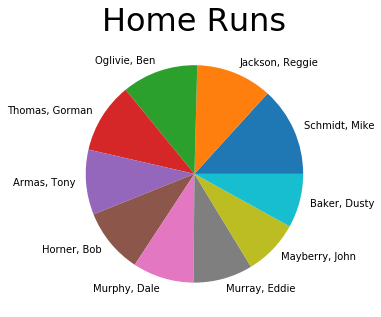

In [15]:
%matplotlib inline

df.plot(
    y="HR", kind='pie', legend=False, label="", figsize=(5, 5)
    ).set_title('Home Runs', fontdict={'fontsize': 32, 'fontweight': 'medium'})

In [16]:
#Create Series of datetime from three numpy.int64 values for year, month, day

In [17]:
#cursor = cnx.cursor()
sql = """
SELECT p.nameFirst, p.nameLast, p.Height, p.Weight, p.throws, p.bats,
p.birthYear, p.birthMonth, p.birthDay,p.birthCountry, b.*
FROM People p
JOIN Batting b ON b.playerID = p.playerID
WHERE yearID between 2014 and 2019 AND b.g >= "50"
ORDER BY b.yearID Desc
LIMIT 25;
"""
cursor.execute(sql)
results = cursor.fetchall()
df_baseball = pd.DataFrame(results)
print(df_baseball.head())

       0         1   2    3  4  5     6   7   8          9   ...   25  26  27  \
0    Jose     Abreu  75  255  R  R  1987   1  29       Cuba  ...  123   2   2   
1  Ronald     Acuna  72  180  R  R  1997  12  18  Venezuela  ...  101  37   9   
2   Willy    Adames  72  205  R  R  1995   9   2       D.R.  ...   52   4   2   
3    Matt     Adams  75  245  R  L  1988   8  31        USA  ...   56   0   0   
4   Ehire  Adrianza  73  195  R  B  1989   8  21  Venezuela  ...   22   0   2   

   28   29  30  31  32  33  34  
0  36  152   4  13   0  10  24  
1  76  188   4   9   0   1   8  
2  46  153   1   3   3   1   9  
3  20  115   1   2   0   1   7  
4  20   40   1   6   2   4   2  

[5 rows x 35 columns]


In [18]:
print(type(cursor.description))
print(type(cursor.description[0]))
print(len(cursor.description))
print(cursor.description)

<class 'list'>
<class 'tuple'>
35
[('nameFirst', 253, None, None, None, None, 1, 0), ('nameLast', 253, None, None, None, None, 1, 0), ('Height', 3, None, None, None, None, 1, 0), ('Weight', 3, None, None, None, None, 1, 0), ('throws', 253, None, None, None, None, 1, 0), ('bats', 253, None, None, None, None, 1, 0), ('birthYear', 3, None, None, None, None, 1, 0), ('birthMonth', 3, None, None, None, None, 1, 0), ('birthDay', 3, None, None, None, None, 1, 0), ('birthCountry', 253, None, None, None, None, 1, 0), ('ID', 3, None, None, None, None, 0, 16899), ('playerID', 253, None, None, None, None, 0, 20489), ('yearID', 2, None, None, None, None, 0, 20481), ('stint', 2, None, None, None, None, 0, 20481), ('teamID', 254, None, None, None, None, 1, 0), ('team_ID', 3, None, None, None, None, 1, 16392), ('lgID', 254, None, None, None, None, 1, 16392), ('G', 2, None, None, None, None, 1, 0), ('G_batting', 2, None, None, None, None, 1, 0), ('AB', 2, None, None, None, None, 1, 0), ('R', 2, None, No

In [19]:
headers = [i[0] for i in cursor.description]
print(headers)
print(type(headers))

['nameFirst', 'nameLast', 'Height', 'Weight', 'throws', 'bats', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'ID', 'playerID', 'yearID', 'stint', 'teamID', 'team_ID', 'lgID', 'G', 'G_batting', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']
<class 'list'>


In [20]:
playerName = list(df_baseball[0] + ", " + df_baseball[1])
df_baseball = pd.DataFrame(results, columns = headers, index=playerName)

'''
    [headers[0],headers[1],headers[2],headers[3],headers[4],headers[5],headers[6],
    headers[7],headers[8],headers[9],headers[10],headers[11],headers[12],
    headers[13],headers[14],headers[15],headers[16],headers[17],headers[18],
    headers[19],headers[20],headers[21],headers[22],headers[23],headers[24],
    headers[25],headers[26],headers[27],headers[28],headers[29],headers[30],
    headers[31],headers[32],headers[33],headers[34]], index=playerName)
    
'''

print(df_baseball.head())

                nameFirst  nameLast  Height  Weight throws bats  birthYear  \
Jose, Abreu          Jose     Abreu      75     255      R    R       1987   
Ronald, Acuna      Ronald     Acuna      72     180      R    R       1997   
Willy, Adames       Willy    Adames      72     205      R    R       1995   
Matt, Adams          Matt     Adams      75     245      R    L       1988   
Ehire, Adrianza     Ehire  Adrianza      73     195      R    B       1989   

                 birthMonth  birthDay birthCountry  ...  RBI  SB  CS  BB   SO  \
Jose, Abreu               1        29         Cuba  ...  123   2   2  36  152   
Ronald, Acuna            12        18    Venezuela  ...  101  37   9  76  188   
Willy, Adames             9         2         D.R.  ...   52   4   2  46  153   
Matt, Adams               8        31          USA  ...   56   0   0  20  115   
Ehire, Adrianza           8        21    Venezuela  ...   22   0   2  20   40   

                 IBB HBP  SH  SF  GIDP  
Jos

In [21]:
print(type(df_baseball['birthYear']))
print(type(df_baseball['birthMonth']))
print(type(df_baseball['birthDay']))
print(type(df_baseball['birthYear'][0]))
print(type(df_baseball['birthMonth'][1]))
print(type(df_baseball['birthDay'][2]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [22]:
# create Series containing single datetime column using three original numpy.int64 columns (note above: index=playerName)
# See: https://stackoverflow.com/questions/19350806/how-to-convert-columns-into-one-datetime-column-in-pandas
print(type(df_baseball.birthYear))    # Series
print(type(df_baseball.birthYear[0])) # numpy.int64
birthDays = pd.to_datetime(dict(year=df_baseball.birthYear, month=df_baseball.birthMonth, day=df_baseball.birthDay))
print(type(birthDays))                # Series
print(birthDays.shape)                # (25,)
print(type(birthDays[0]))             # Timestamp
print(birthDays)                      # dump contents of birthDays Series


<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
<class 'pandas.core.series.Series'>
(25,)
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Jose, Abreu         1987-01-29
Ronald, Acuna       1997-12-18
Willy, Adames       1995-09-02
Matt, Adams         1988-08-31
Ehire, Adrianza     1989-08-21
Jesus, Aguilar      1990-06-30
Nick, Ahmed         1990-03-15
Hanser, Alberto     1992-10-17
Matt, Albers        1983-01-20
Ozzie, Albies       1997-01-07
Jorge, Alfaro       1993-06-11
Greg, Allen         1993-03-15
Albert, Almora      1994-04-16
Pete, Alonso        1994-12-07
Yonder, Alonso      1987-04-08
Yonder, Alonso      1987-04-08
Jose, Altuve        1990-05-06
Jose, Alvarez       1989-05-06
Yordan, Alvarez     1997-06-27
Brian, Anderson     1993-05-19
Justin, Anderson    1992-09-28
Tim, Anderson       1993-06-23
Matt, Andriese      1989-08-28
Elvis, Andrus       1988-08-26
Aristides, Aquino   1994-04-22
dtype: datetime64[ns]


In [23]:
#Draw Sactter Plot to show how home runs have increased over time

In [24]:
sql = "SELECT yearID, HR FROM batting"
cursor.execute(sql)
results = cursor.fetchall()
print(results[0])
print(results[-1])

(1871, 0)
(2019, 9)


   year  hr
0  1871   0
1  1871   0
2  1871   0
3  1871   2
4  1871   0
        year  hr
107424  2019   0
107425  2019   0
107426  2019   6
107427  2019   1
107428  2019   9


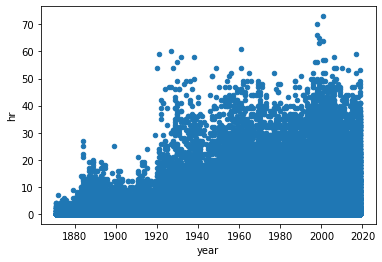

In [25]:
df = pd.DataFrame(results, columns=['year', 'hr'])
print(df.head())
print(df.tail())
df.plot.scatter(x='year', y='hr')

In [26]:
#Create DataFrame with calculated lifeSpan column (deathDay-birthDay)

In [27]:
sql = """
SELECT p.nameFirst,p.nameLast,p.birthYear,p.birthMonth,p.birthDay,p.birthCountry,p.deathYear,
p.deathMonth,p.deathDay,p.weight,p.height,p.bats,p.throws,p.finalGame,b.yearID,b.stint,b.teamID,b.lgID,b.G,b.AB,b.R,b.H,
b.2B,b.3B,b.HR,b.RBI,b.SB,b.CS,b.BB,b.SO,b.IBB,b.HBP,b.SH,b.SF,b.GIDP,a.GP
FROM people p
    JOIN batting b
    ON p.playerID = b.playerID
    JOIN allstarfull a
    ON p.playerID = a.playerID
    ORDER BY b.HR DESC;
"""
cursor = cnx.cursor()
cursor.execute(sql)
results = cursor.fetchall()

In [28]:
import pandas as pd

df = pd.DataFrame(results, columns = ["nameFirst","nameLast","birthYear","birthMonth","birthDay","birthCountry","deathYear",
"deathMonth","deathDay","weight","height","bats","throws","finalGame","yearID","stint","teamID","lgID","G","AB","R","H","2B",
                                      "3B","HR","RBI","SB","CS","BB","SO","IBB","HBP", "SH","SF","GIDP","GP"])
df.head()


,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,deathYear,deathMonth,deathDay,weight,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,GP
0,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
1,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
2,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
3,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1
4,Barry,Bonds,1964,7,24,USA,NaN,NaN,NaN,185,...,13,3.0,177,93,35.0,9,0,2.0,5.0,1


In [29]:
# Drop Rows with any missing value in selected columns
df = df.dropna(how='any', subset=['birthYear','birthMonth','birthDay','deathYear','deathMonth','deathDay'])
df = df.drop_duplicates(['nameFirst', 'nameLast'])
df.head()

,nameFirst,nameLast,birthYear,birthMonth,birthDay,birthCountry,deathYear,deathMonth,deathDay,weight,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,GP
59,Roger,Maris,1934,9,10,USA,1985.0,12.0,14.0,197,...,0,0.0,94,67,0.0,7,0,7.0,16.0,1
66,Babe,Ruth,1895,2,6,USA,1948.0,8.0,16.0,215,...,7,6.0,137,89,NaN,0,14,NaN,NaN,1
74,Jimmie,Foxx,1907,10,22,USA,1967.0,7.0,21.0,195,...,3,7.0,116,96,NaN,0,0,NaN,NaN,0
79,Hank,Greenberg,1911,1,1,USA,1986.0,9.0,4.0,210,...,7,5.0,119,92,NaN,3,3,NaN,NaN,0
140,Ralph,Kiner,1922,10,27,USA,2014.0,2.0,6.0,195,...,6,NaN,117,61,NaN,1,0,NaN,10.0,1


In [30]:
df['birthDays'] = pd.to_datetime(dict(year=df.birthYear, month=df.birthMonth, day=df.birthDay))
df['birthDays'].head()

59    1934-09-10
66    1895-02-06
74    1907-10-22
79    1911-01-01
140   1922-10-27
Name: birthDays, dtype: datetime64[ns]

In [31]:
df['deathDays'] = pd.to_datetime(dict(year=df.deathYear, month=df.deathMonth, day=df.deathDay))
df['deathDays'].head() # For datetime64[ns] types, NaT represents missing values.

59    1985-12-14
66    1948-08-16
74    1967-07-21
79    1986-09-04
140   2014-02-06
Name: deathDays, dtype: datetime64[ns]

In [32]:
df['lifeSpan'] = (df['deathDays'] - df['birthDays']).astype('timedelta64[Y]')
df[['nameFirst', 'nameLast', 'birthDays', 'deathDays', 'lifeSpan']]

,nameFirst,nameLast,birthDays,deathDays,lifeSpan
59,Roger,Maris,1934-09-10,1985-12-14,51.0
66,Babe,Ruth,1895-02-06,1948-08-16,53.0
74,Jimmie,Foxx,1907-10-22,1967-07-21,59.0
79,Hank,Greenberg,1911-01-01,1986-09-04,75.0
140,Ralph,Kiner,1922-10-27,2014-02-06,91.0
...,...,...,...,...,...
71414,Donnie,Moore,1954-02-13,1989-07-18,35.0
71905,Dave,Smith,1955-01-21,2008-12-17,53.0
74318,Rod,Beck,1968-08-03,2007-06-23,38.0
76481,Jose,Lima,1972-09-30,2010-05-23,37.0


In [33]:
#How many double plays did Albert Pujols ground into in 2016?

In [34]:
sql = """
SELECT p.nameFirst, p.nameLast, b.GIDP
FROM People p
JOIN Batting b ON b.playerID=p.playerID
WHERE b.yearID=2016 AND p.nameFirst="Albert" AND p.nameLast="Pujols";
"""

cursor.execute(sql)
results = cursor.fetchall()
print(results)

[('Albert', 'Pujols', 24)]


In [35]:
#PART 2 OF CODE XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [66]:
import platform
import sys
import ssl

print("os:            " + platform.platform())
print("python         " + sys.version)
print("openssl:       " + ssl.OPENSSL_VERSION)
print("TLSv1.2:       " + str(ssl.PROTOCOL_TLSv1_2))
print()

# conda install -c anaconda mysql-connector-python

import mysql.connector as mysql

cnx = mysql.connect(
    host="mysqllahmansbaseball.mysql.database.azure.com", # this server will not remain available in the long term
    user="newuser@mysqllahmansbaseball",                  # this user name will not remain available in the long term
    password="Pa$$w0rd",                                  # this password will not remain available in the long term
    port=3306,
    ssl_disabled=True,                                    # not usually suitable for production code
    database="lahmansbaseballdb")
print(cnx)
print()


os:            Windows-10-10.0.19041-SP0
python         3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
openssl:       OpenSSL 1.1.1d  10 Sep 2019
TLSv1.2:       _SSLMethod.PROTOCOL_TLSv1_2




In [67]:
cursor = cnx.cursor()

sql = """
SELECT p.nameFirst,p.nameLast,p.birthYear,p.birthMonth,p.birthDay,p.birthCountry,p.deathYear,
p.deathMonth,p.deathDay,p.weight,p.height,p.bats,p.throws,p.finalGame,b.yearID,b.stint,b.teamID,b.lgID,b.G,b.AB,b.R,b.H,
b.2B,b.3B,b.HR,b.RBI,b.SB
FROM people p
    JOIN batting b
    ON p.playerID = b.playerID
    JOIN allstarfull a
    ON p.playerID = a.playerID
    ORDER BY b.HR DESC;
"""

cursor.execute(sql)
results = cursor.fetchall()

# Convert results to DataFrame
import pandas as pd
df_age = pd.DataFrame(results)    

# Print out first 5 rows
print(df_age.head(3))
print()
print()

# Adding column names to dataframe
cols = [i[0] for i in cursor.description]
df_age.columns = cols    

# Print the first 3 rows
print(df_age.head(3))                  

# Print the length of df_Age
print(len(df_age))

      0      1     2   3   4    5   6   7   8    9   ...  17   18   19   20  \
0  Barry  Bonds  1964   7  24  USA NaN NaN NaN  185  ...  NL  153  476  129   
1  Barry  Bonds  1964   7  24  USA NaN NaN NaN  185  ...  NL  153  476  129   
2  Barry  Bonds  1964   7  24  USA NaN NaN NaN  185  ...  NL  153  476  129   

    21  22 23  24   25  26  
0  156  32  2  73  137  13  
1  156  32  2  73  137  13  
2  156  32  2  73  137  13  

[3 rows x 27 columns]


  nameFirst nameLast  birthYear  birthMonth  birthDay birthCountry  deathYear  \
0     Barry    Bonds       1964           7        24          USA        NaN   
1     Barry    Bonds       1964           7        24          USA        NaN   
2     Barry    Bonds       1964           7        24          USA        NaN   

   deathMonth  deathDay  weight  ...  lgID    G   AB    R    H  2B 3B  HR  \
0         NaN       NaN     185  ...    NL  153  476  129  156  32  2  73   
1         NaN       NaN     185  ...    NL  153  476  129  156 

In [68]:
df_age['Age'] = df_age['yearID'] - df_age['birthYear']
df_age['Age'].describe()

count    83887.000000
mean        30.211439
std          5.454125
min         16.000000
25%         26.000000
50%         30.000000
75%         34.000000
max         59.000000
Name: Age, dtype: float64

In [69]:
# Querying Database for all seasons where a team played 50 or more games and is still active today. 

sql = '''select * from Teams t 
inner join TeamsFranchises
on t.franchID = TeamsFranchises.franchID
where t.G >= 50 and TeamsFranchises.active = 'Y';
'''

cursor.execute(sql)
results = cursor.fetchall()

# Convert results to DataFrame
#import pandas as pd

df = pd.DataFrame(results)    

# Print out first 5 rows
print(df.head(3))  

     0     1   2    3    4     5   6   7    8     9   ...         44   45  \
0  1368  1961  AL  LAA  ANA  None NaN   8  162  82.0  ...   603510.0  111   
1  1387  1962  AL  LAA  ANA  None NaN   3  162  81.0  ...  1144063.0   97   
2  1407  1963  AL  LAA  ANA  None NaN   9  161  81.0  ...   821015.0   94   

    46   47   48   49   50                             51  52    53  
0  112  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1   97  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
2   94  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  

[3 rows x 54 columns]


In [70]:
headers = [i[0] for i in cursor.description]
print(headers)

['ID', 'yearID', 'lgID', 'teamID', 'franchID', 'divID', 'div_ID', 'teamRank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro', 'franchID', 'franchName', 'active', 'NAassoc']


In [71]:
#'''
# Adding column names to dataframe
#df = pd.DataFrame(results, columns =[i[0] for i in cursor.description])
#print(df.head())
#'''

In [72]:
# Adding column names to dataframe
cols = [i[0] for i in cursor.description]
df.columns = cols    #teams_df

# Print the first rows of `teams_df`
print(df.head(3))                  #teams_df

# Print the length of `teams_df`
print(len(df))

     ID  yearID lgID teamID  franchID divID  div_ID  teamRank    G  Ghome  \
0  1368    1961   AL    LAA       ANA  None     NaN         8  162   82.0   
1  1387    1962   AL    LAA       ANA  None     NaN         3  162   81.0   
2  1407    1963   AL    LAA       ANA  None     NaN         9  161   81.0   

   ...  attendance  BPF  PPF teamIDBR teamIDlahman45 teamIDretro  franchID  \
0  ...    603510.0  111  112      LAA            LAA         LAA       ANA   
1  ...   1144063.0   97   97      LAA            LAA         LAA       ANA   
2  ...    821015.0   94   94      LAA            LAA         LAA       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y     None  
1  Los Angeles Angels of Anaheim       Y     None  
2  Los Angeles Angels of Anaheim       Y     None  

[3 rows x 54 columns]
2686


In [73]:
# Cleaning and Preparing The Data

In [74]:
# Dropping your unnecesary column variables.

drop_cols = ['lgID','franchID','divID','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance',
             'BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID']

#df = teams_df.drop(drop_cols, axis=1)
df = df.drop(drop_cols, axis=1)
# Print out first rows of `df`
print(df.head(3))


     ID  yearID teamID  div_ID  teamRank    G   W    R    AB     H  ...    HA  \
0  1368    1961    LAA     NaN         8  162  70  744  5424  1331  ...  1391   
1  1387    1962    LAA     NaN         3  162  86  718  5499  1377  ...  1412   
2  1407    1963    LAA     NaN         9  161  70  597  5506  1378  ...  1317   

   HRA  BBA  SOA    E   DP     FP                     franchName  active  \
0  180  713  973  192  154  0.969  Los Angeles Angels of Anaheim       Y   
1  118  616  858  175  153  0.972  Los Angeles Angels of Anaheim       Y   
2  120  578  889  163  155  0.974  Los Angeles Angels of Anaheim       Y   

   NAassoc  
0     None  
1     None  
2     None  

[3 rows x 35 columns]


In [75]:
#['ID', 'yearID','teamID', 'div_ID', 'teamRank', 'G', 'W', 
#  'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'RA', 'ER', 'ERA', 'CG', 'SHO', 
# 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP','franchName', 'active', 'NAassoc']

In [76]:
# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())


[0, 0, 0, 1278, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 40, 640, 1018, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2398]


In [77]:
# Eliminating columns with null values
df = df.drop(['div_ID', 'CS', 'HBP', 'NAassoc'], axis=1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['SB'] = df['SB'].fillna(df['SB'].median())

# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [78]:
#df = pd.DataFrame(results, columns = ['nameFirst', 'nameLast','Weight', 'HR', 'W' 'team', 'yearID'])

headers = ['ID', 'yearID','teamID', 'teamRank', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 
           'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP','franchName', 'active']

df.columns = headers    

#Print the first 3 rows of df
print(df.head(3))               

# Print the length of df
print(len(df))


     ID  yearID teamID  teamRank    G   W    R    AB     H   2B  ...  IPouts  \
0  1368    1961    LAA         8  162  70  744  5424  1331  218  ...    4314   
1  1387    1962    LAA         3  162  86  718  5499  1377  232  ...    4398   
2  1407    1963    LAA         9  161  70  597  5506  1378  208  ...    4365   

     HA  HRA  BBA  SOA    E   DP     FP                     franchName  active  
0  1391  180  713  973  192  154  0.969  Los Angeles Angels of Anaheim       Y  
1  1412  118  616  858  175  153  0.972  Los Angeles Angels of Anaheim       Y  
2  1317  120  578  889  163  155  0.974  Los Angeles Angels of Anaheim       Y  

[3 rows x 31 columns]
2686


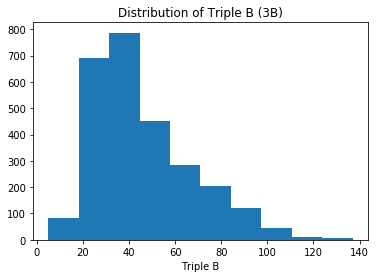

In [79]:
#Exploring and Visualizing data
# importing the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline  
get_ipython().run_line_magic('matplotlib', 'inline')

# Plotting distribution of Home Runs
plt.hist(df['3B'])
plt.xlabel('Triple B')
plt.title('Distribution of Triple B (3B)')

plt.show()


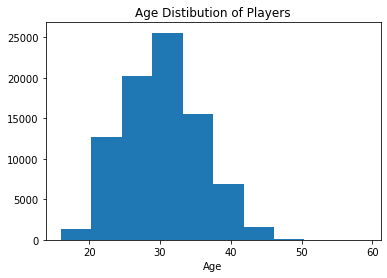

In [80]:
# Plotting distribution of Home Runs
plt.hist(df_age['Age'])
plt.xlabel('Age')
plt.title('Age Distibution of Players')

plt.show()

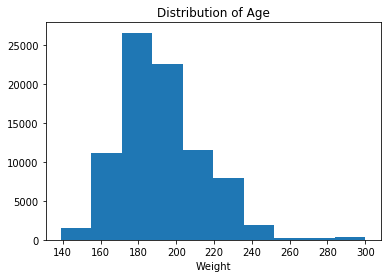

In [81]:
# Plotting distribution of Home Runs
plt.hist(df_age['weight'])
plt.xlabel('Weight')
plt.title('Distribution of Age')

plt.show()

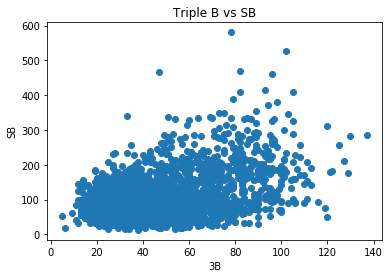

In [82]:
# Plotting scatter graph of Year vs. Wins
import matplotlib.pyplot as plt
plt.scatter(df['3B'], df['SB'])
plt.title('Triple B vs SB')
plt.xlabel('3B')
plt.ylabel('SB')

plt.show()


In [83]:
#Printing out the average Home Runs (HR) per year
print(df['3B'].mean())


45.734177215189874


In [84]:
# Creating bins for the Weight column
def assign_Weight_bins(Weight):
    if Weight < 99:
        return 1
    if Weight >= 100 and Weight <= 159:
        return 2
    if Weight >= 160 and Weight <= 259:
        return 3
    if Weight >= 260:
        return 4
  
df_age['Weight_bins'] = df_age['weight'].apply(assign_Weight_bins)

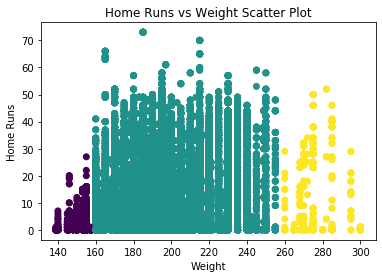

In [85]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df_age['weight'], df_age['HR'], c=df_age['Weight_bins'])
plt.title('Home Runs vs Weight Scatter Plot')
plt.xlabel('Weight')
plt.ylabel('Home Runs')

plt.show()


In [86]:
# Creating bins for the Weight column
def assign_Age_bins(Age):
    if Age < 21:
        return 1
    if Age >= 21 and Age <= 29:
        return 2
    if Age >= 30 and Age <= 39:
        return 3
    if Age >= 40:
        return 4
  
df_age['Age_bins'] = df_age['Age'].apply(assign_Age_bins)

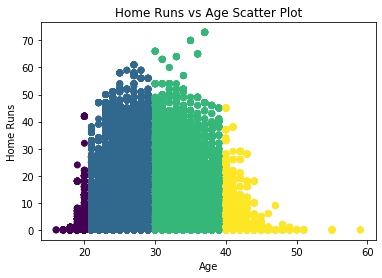

In [87]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df_age['Age'], df_age['HR'], c=df_age['Age_bins'])
plt.title('Home Runs vs Age Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Home Runs')

plt.show()


In [88]:
''' 
   To create your win labels, you’ll create a function called assign_win_bins which will take in an integer value (wins) 
   and return an integer of 1-5 depending on the input value.

    Create a new column HR_bins by using the apply() method on the Home Run column and passing in the 
    assign_HR_bins() function.
'''

# Creating bins for the HR column
def assign_HR_bins(HR):
    if HR < 50:
        return 1
    if HR >= 50 and HR <= 79:
        return 2
    if HR >= 80 and HR <= 109:
        return 3
    if HR >= 110 and HR <= 139:
        return 4
    if HR >= 140:
        return 5
    
df['HR_bins'] = df['HR'].apply(assign_HR_bins)

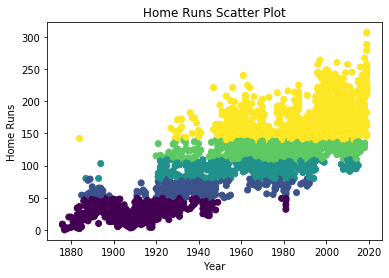

In [61]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['HR'], c=df['HR_bins'])
plt.title('Home Runs Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Home Runs')

plt.show()



In [198]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

In [199]:
''' Let’s make a graph below that indicates how much scoring there was for each year. You’ll start by creating dictionaries 
   runs_per_year and games_per_year. Loop through the dataframe using the iterrows() method. Populate the runs_per_year 
   dictionary with years as keys and how many runs were scored that year as the value. Populate the games_per_year 
   dictionary with years as keys and how many games were played that year as the value. '''

# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        
print(runs_per_year)
print(games_per_year)
    

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1981: 11147, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1994: 15752, 1995: 19554, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 2017: 22582, 2018: 21630, 2019: 23467, 1901: 11067, 1902: 9901, 1903: 9892, 1904: 9305, 1905: 9639, 1906: 8881, 1907: 8703, 1908: 8422, 1909: 8810, 1910: 9584, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1918: 7385, 1919: 8657, 1

In [200]:
''' Next, create a dictionary called mlb_runs_per_game. Iterate through the games_per_year dictionary with the items() method. 
    Populate the mlb_runs_per_game dictionary with years as keys and the number of runs scored per game, league wide, as the 
    value.'''

# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games
    
print(mlb_runs_per_game)


{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.459723546234509, 1980: 4.2881235154394295, 1981: 3.998206599713056, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1994: 4.9225, 1995: 4.847297967278136, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001

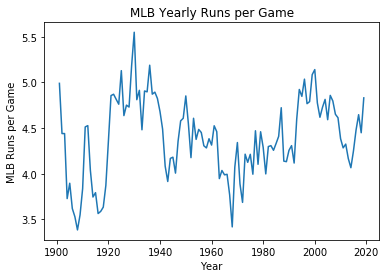

In [201]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()


In [202]:
#Adding New Features
#Adding New Features
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

'''Now that you have a better idea of scoring trends, you can create new variables that indicate a specific era that each row 
   of data falls in based on the yearID. You’ll follow the same process as you did above when you created the win_bins column.

   This time however, you will create dummy columns; a new column for each era. You can use the get_dummies() method for this.
'''
   
#Creating "year_label" column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

print(df.head(3))

     ID  yearID teamID  teamRank    G   W    R    AB     H   2B  ...  HR_bins  \
0  1368    1961    LAA         8  162  70  744  5424  1331  218  ...        5   
1  1387    1962    LAA         3  162  86  718  5499  1377  232  ...        4   
2  1407    1963    LAA         9  161  70  597  5506  1378  208  ...        3   

   year_label  era_1  era_2  era_3  era_4  era_5  era_6  era_7  era_8  
0           4      0      0      0      1      0      0      0      0  
1           4      0      0      0      1      0      0      0      0  
2           5      0      0      0      0      1      0      0      0  

[3 rows x 41 columns]


In [203]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''Since you already did the work to determine MLB runs per game for each year, add that data to the data set'''

# Create column for MLB runs per game from the mlb_runs_per_game dictionary
def assign_mlb_rpg(year):
    return mlb_runs_per_game[year]

df['mlb_rpg'] = df['yearID'].apply(assign_mlb_rpg)


In [204]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''Now you’ll convert the years into decades by creating dummy columns for each decade. Then you can drop the columns that 
   you don’t need anymore.
'''

# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

In [205]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''The bottom line in the game of baseball is how many runs you score and how many runs you allow. You can significantly 
   increase the accuracy of your model by creating columns which are ratios of other columns of data. Runs per game and 
   runs allowed per game will be great features to add to our data set.

   Pandas makes this very simple as you create a new column by dividing the R column by the G column to create the 
   R_per_game column.
'''
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']


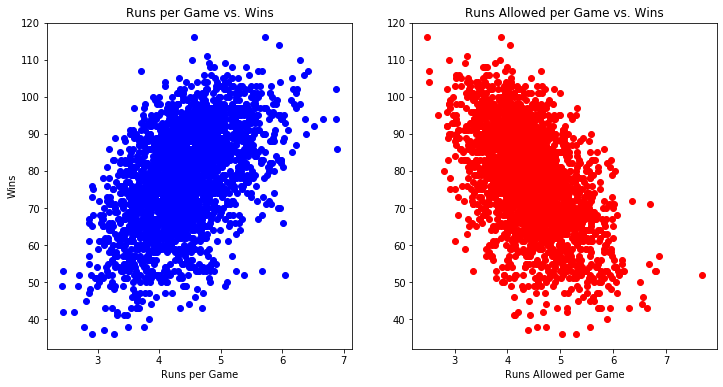

In [206]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''Now look at how each of the two new variables relate to the target wins column by making a couple scatter graphs. 
   Plot the runs per game on the x-axis of one graph and runs allowed per game on the x-axis of the other. Plot the W column 
   on each y-axis.
'''


# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

In [207]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''Before getting into any machine learning models, it can be useful to see how each of the variables is correlated with the 
   target variable. Pandas makes this easy with the corr() method.
'''

df.corr()['W']

ID             0.143726
teamRank      -0.827837
G              0.341866
W              1.000000
R              0.597337
AB             0.369080
H              0.468780
2B             0.329622
3B             0.029655
HR             0.339455
BB             0.415756
SO             0.130282
SB             0.114635
RA            -0.373625
ER            -0.244374
ERA           -0.388871
CG            -0.052559
SHO            0.440667
SV             0.393287
IPouts         0.408648
HA            -0.159099
HRA            0.064525
BBA           -0.148393
SOA            0.301475
E             -0.265635
DP             0.107164
FP             0.309362
HR_bins        0.306326
era_1         -0.118461
era_2         -0.052262
era_3         -0.022104
era_4         -0.023090
era_5          0.063559
era_6          0.028758
era_7          0.030439
era_8          0.073059
mlb_rpg        0.010268
decade_1910   -0.118461
decade_1920   -0.032122
decade_1930   -0.036669
decade_1940   -0.029728
decade_1950   -0

In [208]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''Another feature you can add to the dataset are labels derived from a K-means cluster algorithm provided by sklearn. 
   K-means is a simple clustering algorithm that partitions the data based on the number of k centroids you indicate. 
   Each data point is assigned to a cluster based on which centroid has the lowest Euclidian distance from the data point.

   You can learn more about K-means clustering here.
'''

#First, create a DataFrame that leaves out the target variable
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
              'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6',
              'era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960',
              'decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg']

data_attributes = df[attributes]

# Print the first rows of `df`
print(df.head())

     ID teamID  teamRank    G   W    R    AB     H   2B  3B  ...  decade_1940  \
0  1368    LAA         8  162  70  744  5424  1331  218  22  ...            0   
1  1387    LAA         3  162  86  718  5499  1377  232  35  ...            0   
2  1407    LAA         9  161  70  597  5506  1378  208  38  ...            0   
3  1427    LAA         5  162  82  544  5362  1297  186  27  ...            0   
4  1440    CAL         7  162  75  527  5354  1279  200  36  ...            0   

   decade_1950  decade_1960  decade_1970  decade_1980  decade_1990  \
0            0            1            0            0            0   
1            0            1            0            0            0   
2            0            1            0            0            0   
3            0            1            0            0            0   
4            0            1            0            0            0   

   decade_2000  decade_2010  R_per_game  RA_per_game  
0            0            0    4.5925

In [209]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''One aspect of K-means clustering that you must determine before using the model is how many clusters you want. 
   You can get a better idea of your ideal number of clusters by using sklearn’s silhouette_score() function. This function 
   returns the mean silhouette coefficient over all samples. You want a higher silhouette score, and the score decreases as 
   more clusters are added.
'''

#Import necessary modules from `sklearn` 
from sklearn.cluster import KMeans
from sklearn import metrics

# Create silhouette score dictionary
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data_attributes)
    s_s = metrics.silhouette_score(data_attributes, l)
    s_score_dict[i] = [s_s]

# Print out `s_score_dict`
print(s_score_dict)

{2: [0.3942871108468793], 3: [0.4008822113617578], 4: [0.26164714470119005], 5: [0.2705333018456156], 6: [0.24955022439836896], 7: [0.24568205062703471], 8: [0.23983744196306467], 9: [0.21755812488297827], 10: [0.2090496393589429]}


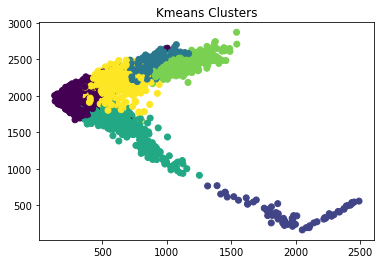

In [210]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
''' Now you can initialize the model. Set your number of clusters to 6 and the random state to 1. Determine the Euclidian 
    distances for each data point by using the fit_transform() method and then visualize the clusters with a scatter plot.
'''

# Create K-means model and determine euclidian distances for each data point
kmeans_model = KMeans(n_clusters=6, random_state=1)
distances = kmeans_model.fit_transform(data_attributes)

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_

plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')

plt.show()

In [211]:
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''Now look at how each of the two new variables relate to the target wins column by making a couple scatter graphs. 
   Plot the runs per game on the x-axis of one graph and runs allowed per game on the x-axis of the other. Plot the W column 
   on each y-axis.
'''

#Add labels from K-means model to `df` DataFrame and attributes list
df['labels'] = labels
attributes.append('labels')

# Print the first rows of `df`
print(df.head())

     ID teamID  teamRank    G   W    R    AB     H   2B  3B  ...  decade_1950  \
0  1368    LAA         8  162  70  744  5424  1331  218  22  ...            0   
1  1387    LAA         3  162  86  718  5499  1377  232  35  ...            0   
2  1407    LAA         9  161  70  597  5506  1378  208  38  ...            0   
3  1427    LAA         5  162  82  544  5362  1297  186  27  ...            0   
4  1440    CAL         7  162  75  527  5354  1279  200  36  ...            0   

   decade_1960  decade_1970  decade_1980  decade_1990  decade_2000  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            1            0            0            0            0   

   decade_2010  R_per_game  RA_per_game  labels  
0            0    4.592593     4.839506   

In [212]:
'''Before you can build your model, you need to split your data into train and test sets. You do this because if you do decide
   to train your model on the same data that you test the model, your model can easily overfit the data: the model will more 
   memorize the data instead of learning from it, which results in excessively complex models for your data. That also explains 
   why an overfitted model will perform very poorly when you would try to make predictions with new data.

   But don’t worry just yet, there are a number of ways to cross-validate your model.

   This time, you will simply take a random sample of 75 percent of our data for the train data set and use the other 25 
   percent for your test data set. Create a list numeric_cols with all of the columns you will use in your model. Next, create 
   a new DataFrame data from the df DataFrame with the columns in the numeric_cols list. Then, also create your train and test 
   data sets by sampling the DataFrame data.
'''

# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA',
                'SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910',
                'decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980',
                'decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','mlb_rpg','labels','W']
data = df[numeric_cols]
print(data.head())

# Split data DataFrame into train and test sets
train = data.sample(frac=0.75, random_state=1)
test = data.loc[~data.index.isin(train.index)]

x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

     G    R    AB     H   2B  3B   HR   BB      SO     SB  ...  decade_1970  \
0  162  744  5424  1331  218  22  189  681  1068.0   37.0  ...            0   
1  162  718  5499  1377  232  35  137  602   917.0   46.0  ...            0   
2  161  597  5506  1378  208  38   95  448   916.0   43.0  ...            0   
3  162  544  5362  1297  186  27  102  472   920.0   49.0  ...            0   
4  162  527  5354  1279  200  36   92  443   973.0  107.0  ...            0   

   decade_1980  decade_1990  decade_2000  decade_2010  R_per_game  \
0            0            0            0            0    4.592593   
1            0            0            0            0    4.432099   
2            0            0            0            0    3.708075   
3            0            0            0            0    3.358025   
4            0            0            0            0    3.253086   

   RA_per_game   mlb_rpg  labels   W  
0     4.839506  4.525175       2  70  
1     4.358025  4.460518       5

In [213]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#Selecting Error Metric and Model
''' Mean Absolute Error (MAE) is the metric you’ll use to determine how accurate your model is. It measures how close the 
    predictions are to the eventual outcomes. Specifically, for this data, that means that this error metric will provide you 
    with the average absolute value that your prediction missed its mark.

    This means that if, on average, your predictions miss the target amount by 5 wins, your error metric will be 5.

    The first model you will train will be a linear regression model. You can import LinearRegression and mean_absolute_error 
    from sklearn.linear_model and sklearn.metrics respectively, and then create a model lr. Next, you’ll fit the model, make 
    predictions and determine mean absolute error of the model.'''

# Import `LinearRegression` from `sklearn.linear_model`
from sklearn.linear_model import LinearRegression

# Import `mean_absolute_error` from `sklearn.metrics`
from sklearn.metrics import mean_absolute_error

# Create Linear Regression model, fit model, and make predictions
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

# Determine mean absolute error
mae = mean_absolute_error(y_test, predictions)

# Print `mae`
print(mae)

2.7911458199973898


In [214]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''If you recall from above, the average number of wins was about 79 wins. On average, the model is off by only 2.687 wins.

   Now try a Ridge regression model. Import RidgeCV from sklearn.linear_model and create model rrm. The RidgeCV model allows 
   you to set the alpha parameter, which is a complexity parameter that controls the amount of shrinkage (read more here). 
   The model will use cross-validation to deterime which of the alpha parameters you provide is ideal.

   Again, fit your model, make predictions and determine the mean absolute error.'''


# Import `RidgeCV` from `sklearn.linear_model`
from sklearn.linear_model import RidgeCV

# Create Ridge Linear Regression model, fit model, and make predictions
rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)
rrm.fit(x_train, y_train)
predictions_rrm = rrm.predict(x_test)

# Determine mean absolute error
mae_rrm = mean_absolute_error(y_test, predictions_rrm)
print(mae_rrm)

2.901485684895373


In [215]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
'''This model performed slightly better, and is off by 2.673 wins, on average.

    Sports Analytics & Scikit-Learn
    This concludes the first part of this tutorial series in which you have seen how you can use scikit-Learn to analyze sports 
    data. You imported the data from an SQLite database, cleaned it up, explored aspects of it visually, and engineered several
    new features. You learned how to create a K-means clustering model, a couple different Linear Regression models, and how 
    to test your predictions with the mean absolute error metric.

    In the second part, you’ll see how to use classification models to predict which players make it into the MLB Hall of 
    Fame'''

'This model performed slightly better, and is off by 2.673 wins, on average.\n\n    Sports Analytics & Scikit-Learn\n    This concludes the first part of this tutorial series in which you have seen how you can use scikit-Learn to analyze sports \n    data. You imported the data from an SQLite database, cleaned it up, explored aspects of it visually, and engineered several\n    new features. You learned how to create a K-means clustering model, a couple different Linear Regression models, and how \n    to test your predictions with the mean absolute error metric.\n\n    In the second part, you’ll see how to use classification models to predict which players make it into the MLB Hall of \n    Fame'